In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [12]:
res = loadmat('matlab.mat')
with open('test.out','r') as f:
    text = f.read()
text = text.split('\n')

In [13]:
zk

[3.846108078296322,
 3.832505407264782,
 3.831754550203739,
 3.84606327707363,
 3.915242638507024,
 3.955946052106307,
 3.846106284812391,
 3.832503595106539,
 3.872294392952475,
 3.84610762938544,
 3.83250495534407,
 3.851906721993923,
 3.846063277161193,
 3.915242636182875,
 3.955946048811725,
 3.846106284844081,
 3.832503596361359,
 3.872294386483683,
 3.846107629816579,
 3.83250495560215,
 3.851906721472485,
 3.846108078316111]

In [32]:
d = np.array(res['res_d'][0], dtype = int)
eps = np.array(res['res_eps'][0], dtype = float)
loss = np.array(res['res_loss'][0], dtype = float)
npoint = np.array(res['res_npoint'][0], dtype = int)
max_len = d.shape[0]

uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']
uq = uq[:max_len]

ud_p = [float(text[i+2]) for i,t in enumerate(text) if t == 'ud_p =']
ud_p = ud_p[:max_len]

zk = [float(text[i+2]) for i,t in enumerate(text) if t == 'zk =']
zk = zk[:max_len]

e_val = np.array(zk)**2

In [33]:
dat_dict = {
    'd':d,
    'eps':eps,
    'loss':loss,
    'npoint':npoint,
    'uq':uq,
    'zk':zk,
    'ud_p':ud_p,
    'e_val':e_val
}

# trim to equal length
min_len = min([len(dat_dict[k]) for k in dat_dict])
print(min_len)
for k in dat_dict:
    dat_dict[k] = dat_dict[k][:min_len]

data = pd.DataFrame(dat_dict)
data.to_csv('crit_pt.csv')

23


In [34]:
data = data[data.d==1]

In [35]:
data

,d,eps,loss,npoint,uq,zk,ud_p,e_val
0,1,0.0000,-0.365584,16,0.019385,3.846108,0.104832,14.792547
1,1,0.0000,-0.365584,64,0.009746,3.832505,0.052336,14.688098
2,1,0.0000,-0.365584,256,0.004966,3.831755,0.026657,14.682343
3,1,0.0050,-0.365584,16,0.019257,3.846063,0.104140,14.792203
4,1,0.0050,-0.365564,64,0.009723,3.915243,0.054483,15.329125
5,1,0.0050,-0.365540,256,0.004863,3.955946,0.027822,15.649509
6,1,0.0010,-0.365584,16,0.019665,3.846106,0.106348,14.792534
7,1,0.0010,-0.365584,64,0.009825,3.832504,0.052759,14.688084
8,1,0.0010,-0.365579,256,0.004932,3.872294,0.027034,14.994664
9,1,0.0005,-0.365584,16,0.018925,3.846108,0.102344,14.792544


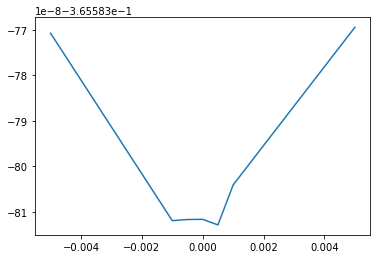

In [29]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

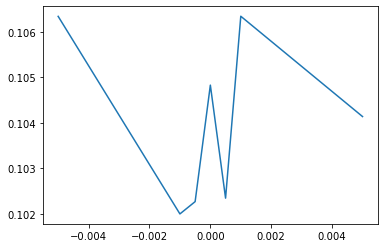

In [30]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['ud_p'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

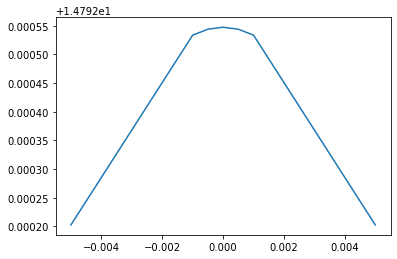

In [36]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['e_val'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

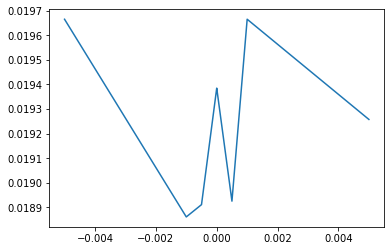

In [112]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

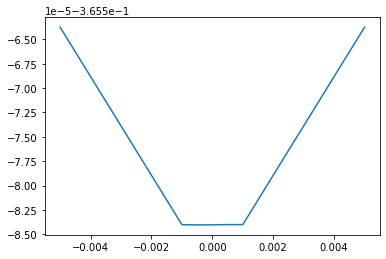

In [37]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

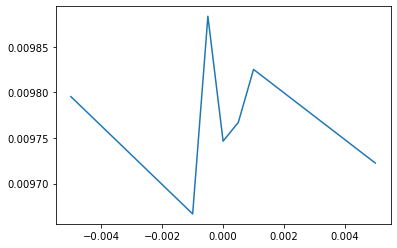

In [37]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

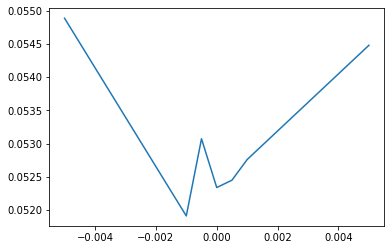

In [38]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['ud_p'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

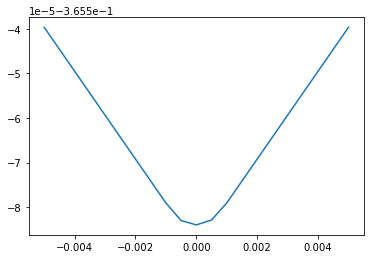

In [67]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['loss'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

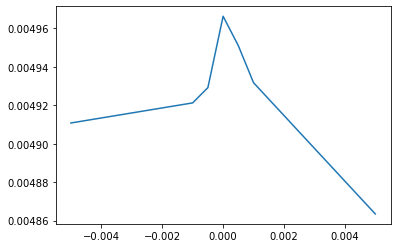

In [115]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['uq'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

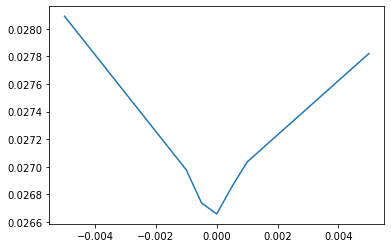

In [39]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['uq'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['ud_p'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

<ipython-input-117-b5064592e9e1>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(abs(y-z)))


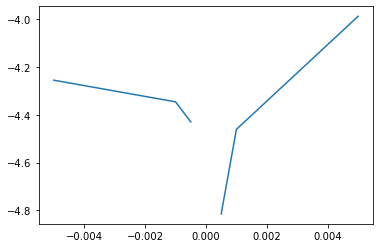

In [117]:
plt.plot(x, np.log10(abs(y-z)))

In [80]:
eps = 5e-3

n = 256
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri256 = deri

n = 64
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri64 = deri

n = 16
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri16 = deri

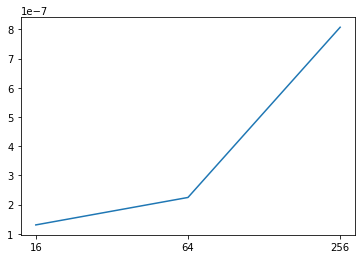

In [81]:
plt.plot(['16','64','256'], [deri16, deri64, deri256])

In [52]:
x2

-0.3655790801141029

In [82]:
with open('test.out','r') as f:
    text = f.read()
text = text.split('\n')

In [85]:
text = text.split('\n')

In [98]:
uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']

In [99]:
uq

[0.019384854464177,
 0.009746486812211,
 0.004966298991687,
 0.019257391935054,
 0.009722515071168,
 0.004863473018722,
 0.019665277433348,
 0.009825183558538,
 0.004931729938919,
 0.0189248272107,
 0.009767084114316,
 0.004950992232231,
 0.019665262547568,
 0.009795347668337,
 0.004910776846609,
 0.018860638347552,
 0.009666709033792,
 0.004921221314666,
 0.01891064338254,
 0.009883511054177,
 0.004929157269567,
 0.019384854464121,
 0.009746486812181]

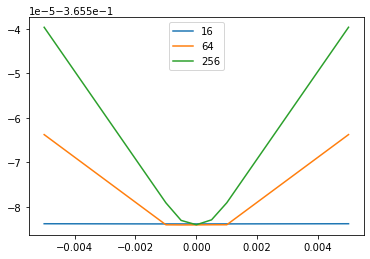

In [127]:
plt_val = 'loss'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)
plt.legend()

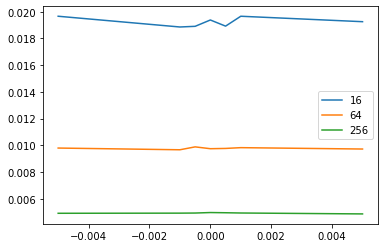

In [129]:
plt_val = 'uq'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)
plt.legend()

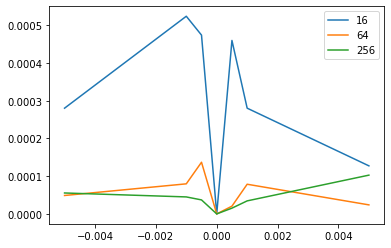

In [40]:
plt_val = 'uq'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

plt.plot()
plt.legend()

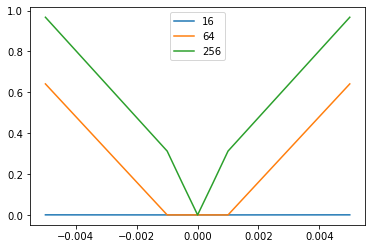

In [41]:
plt_val = 'e_val'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

plt.plot()
plt.legend()

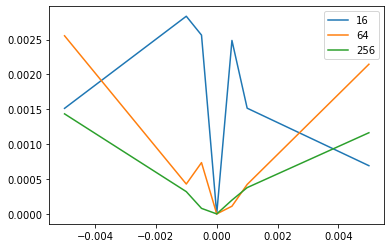

In [42]:
plt_val = 'ud_p'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

plt.plot()
plt.legend()